In [38]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 1.What are the key statistical measures for each ETF and individual stock, such as mean, median, standard deviation, and skewness, over the 5-year period?!

In [42]:
# Stats for EQUITY
equity_folder = 'EQUITY/'
equity_stats = []
equity_files = os.listdir(equity_folder)
for file in equity_files:
    if file.endswith('.csv'):
        equity_df = pd.read_csv(os.path.join(equity_folder, file))
        close_prices = equity_df['Close']
        equity_stat = {
            'Equity': file.replace('.csv', ''),
            'Mean': close_prices.mean(),
            'Median': close_prices.median(),
            'Standard Deviation': close_prices.std(),
            'Skewness': close_prices.skew()
        }
        equity_stats.append(equity_stat)
# Display results
print("Summary Statistics for Equities:")
print(pd.DataFrame(equity_stats))


Summary Statistics for Equities:
   Equity        Mean      Median  Standard Deviation  Skewness
0       V  178.373593  185.919907           37.424426 -0.327646
1    OPEN   14.724128   14.797500            7.480094  0.324175
2     GPN  146.856194  143.693893           32.410151  0.241310
3    UPST  116.717468  106.005001           86.492984  1.222477
4    LMND   61.651375   61.135000           36.406889  0.778762
5    COIN  186.912902  221.139999           90.414355 -0.183545
6    INTU  324.081602  281.594421          129.805943  0.727366
7    MELI  843.828999  666.460022          483.144635  0.622659
8    AFRM   66.356763   62.910000           39.361505  0.690505
9    PYPL  140.018054  107.540001           68.700727  0.951763
10   GDOT   48.337085   48.480000           18.607846  0.273899
11   HOOD   19.940417   12.400000           14.026528  1.111257
12    FIS  115.049965  112.796593           19.433307  0.110886
13     GS  251.782104  219.473892           72.721979  0.644611
14   SO

In [28]:
# Stats for ETFs
etf_folder = 'ETFs/'
etf_stats = []
etf_files = os.listdir(etf_folder)
for file in etf_files:
    if file.endswith('.csv'):
        etf_df = pd.read_csv(os.path.join(etf_folder, file))
        close_prices = etf_df['Close']
        
        etf_stat = {
            'ETF': file.replace('.csv', ''),
            'Mean': close_prices.mean(),
            'Median': close_prices.median(),
            'Standard Deviation': close_prices.std(),
            'Skewness': close_prices.skew()
        }
        etf_stats.append(etf_stat)
        
print("\nSummary Statistics for ETFs:")
print(pd.DataFrame(etf_stats))


Summary Statistics for ETFs:
    ETF        Mean      Median  Standard Deviation  Skewness
0  TPAY   35.001634   33.015749            7.151443  0.423456
1  ARKF   32.947462   26.979259           13.532497  0.468069
2  EMFQ   34.528060   28.551001           11.569409  0.582082
3  KOIN   31.179338   29.365662            7.194192  0.371685
4  FINX   30.709403   27.490252            8.510884  0.763048
5  BLOK   23.855178   17.394224           11.373659  1.087033
6   IYG  141.289292  128.744476           27.128120  0.635255
7  BITQ   16.764564   17.670000            7.535658 -0.025411
8  IPAY   49.243082   46.825901           11.397225  0.650978
9  FNTC   16.609984   15.402000            4.471350  0.523541


### Can you identify any noticeable trends or patterns in the historical data of ETFs and individual stocks?

#### Equity Plots

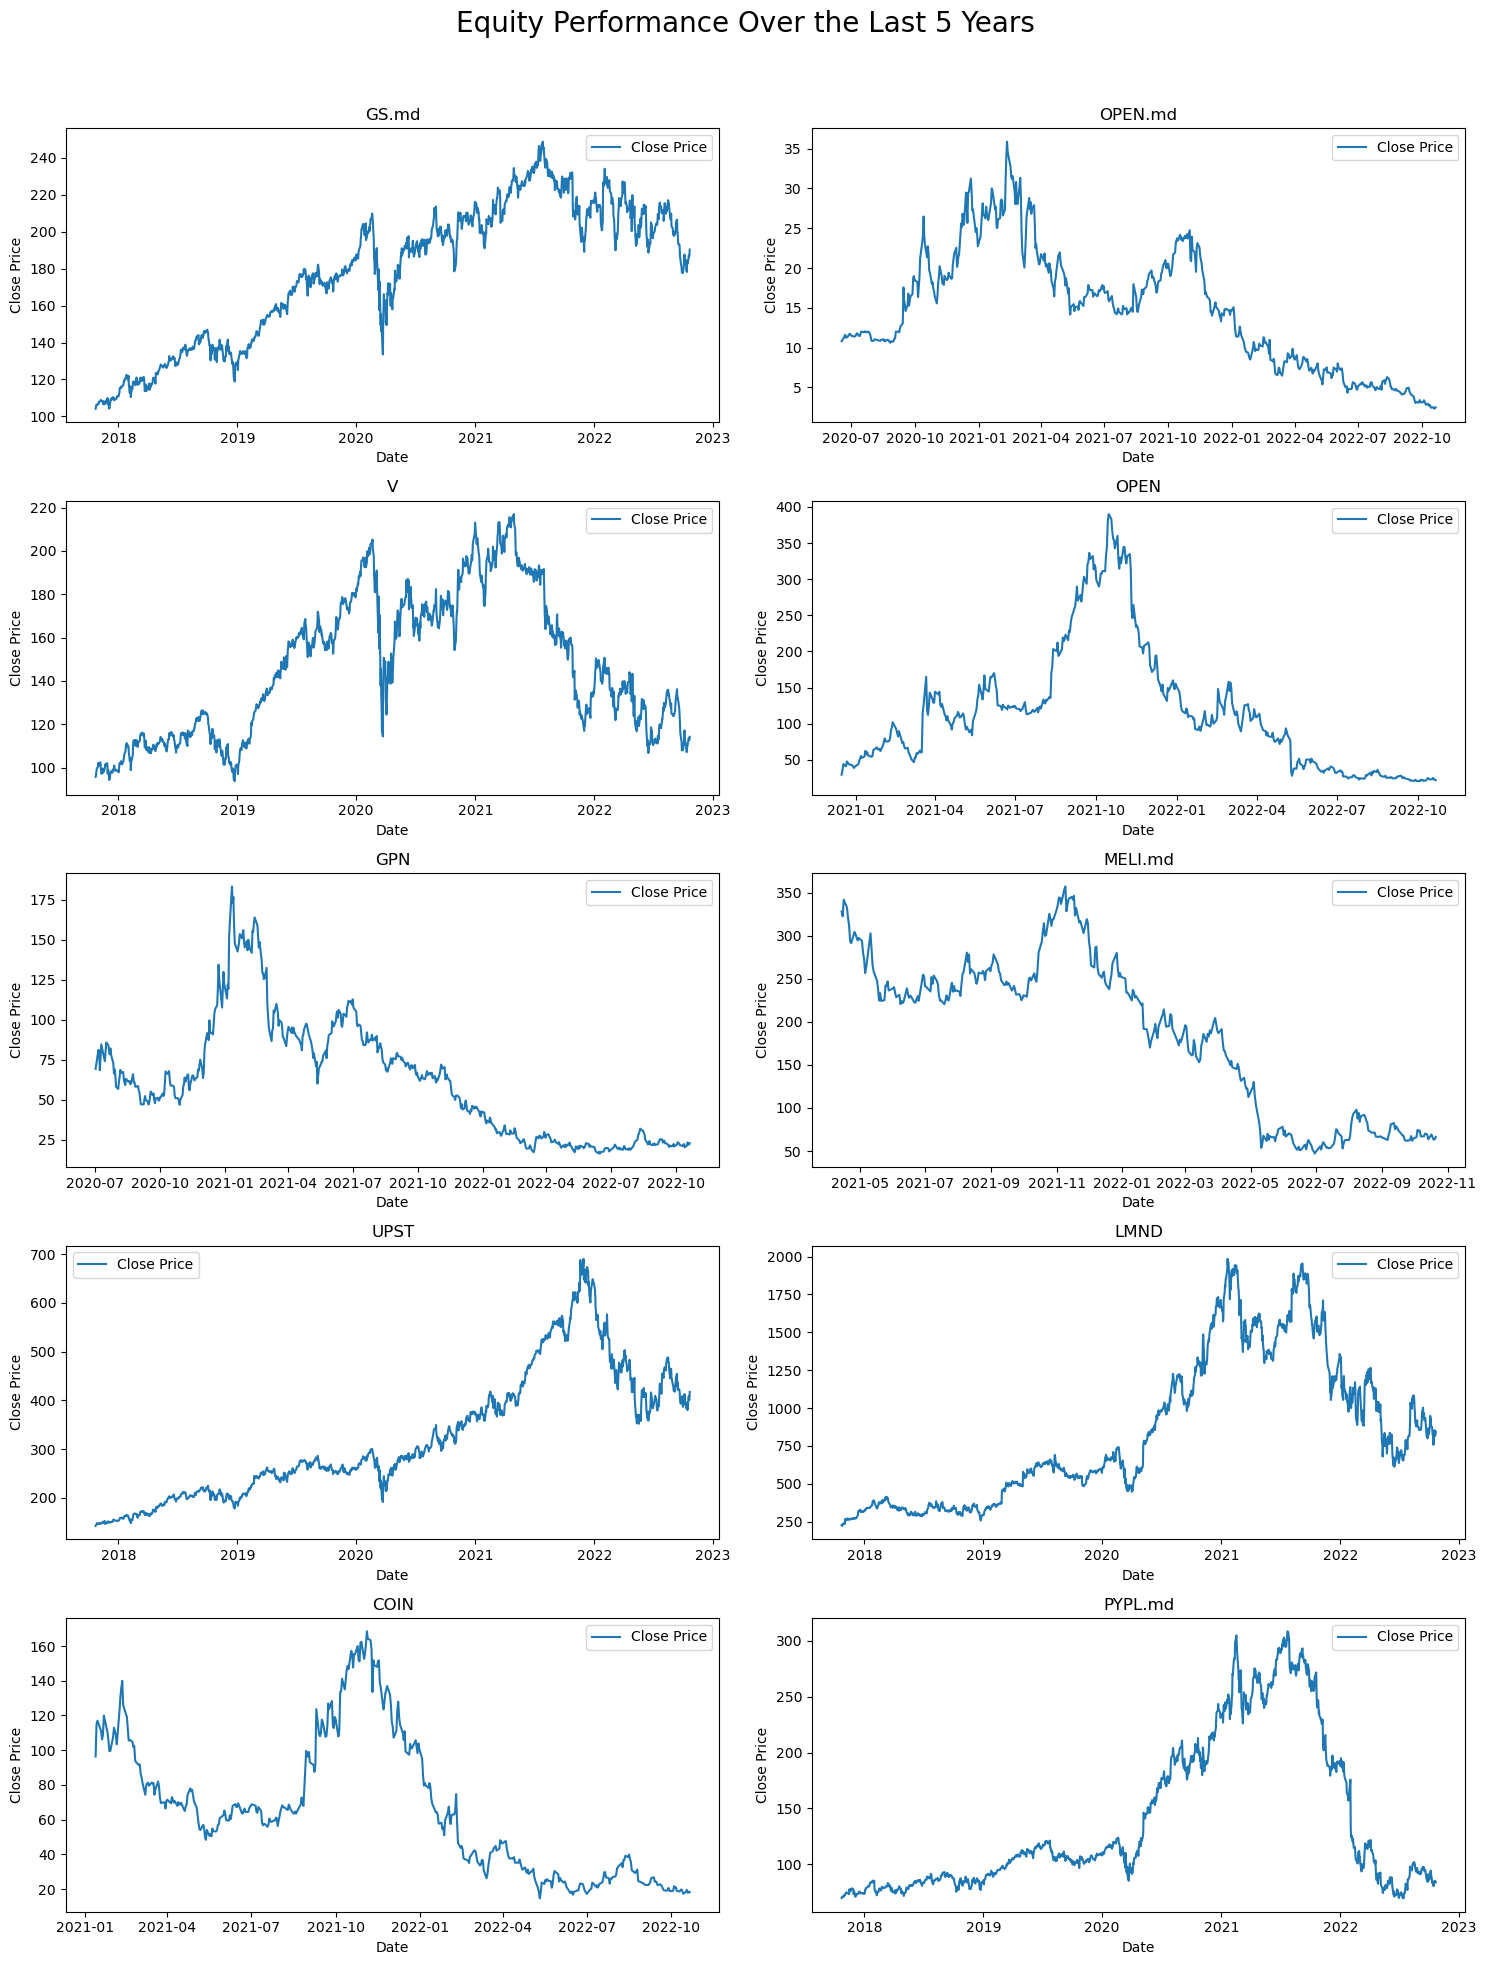

In [51]:
# Creating individual Dataframes
equity_dfs = [pd.read_csv(os.path.join(equity_folder, file), parse_dates=['Date']) for file in equity_files if file.endswith('.csv')]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Equity Performance Over the Last 5 Years', fontsize=20)

# Plot each dataframe on a separate subplot
for idx, ax in enumerate(axes.flat):
    equity_df = equity_dfs[idx]
    
    # Customize the plot as needed
    ax.plot(equity_df['Date'], equity_df['Close'], label='Close Price')
    ax.set_title(equity_files[idx].replace('.csv', ''))
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

#### Equity Plots

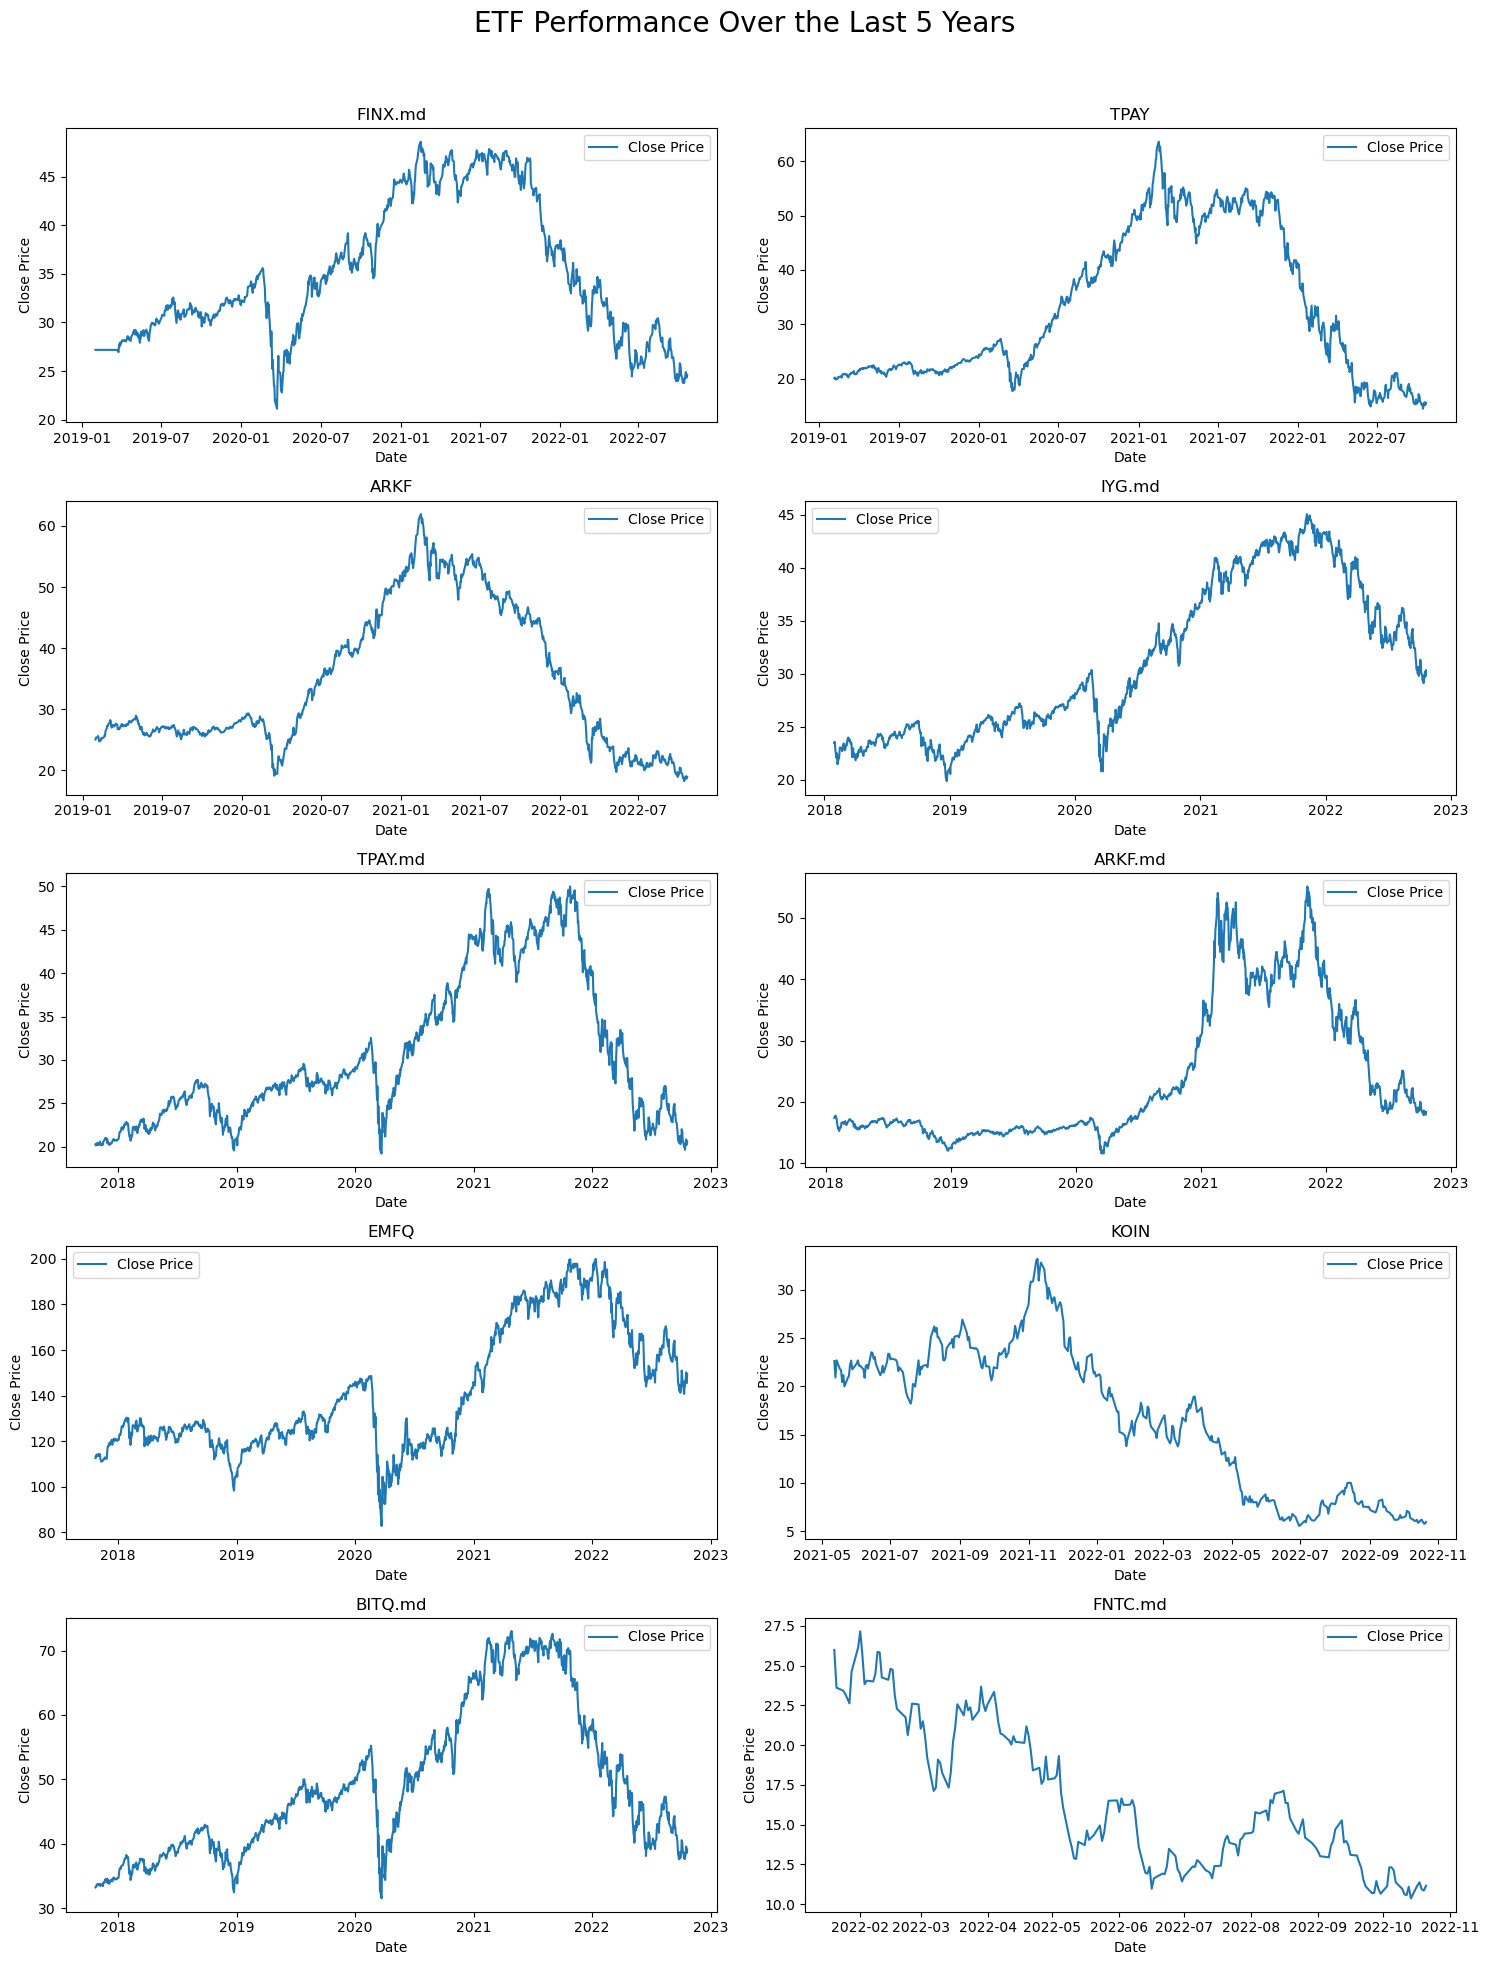

In [52]:
etf_dfs = [pd.read_csv(os.path.join(etf_folder, file), parse_dates=['Date']) for file in etf_files if file.endswith('.csv')]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('ETF Performance Over the Last 5 Years', fontsize=20)

# Plot each dataframe on a separate subplot
for idx, ax in enumerate(axes.flat):
    etf_df = etf_dfs[idx]
    
    # Customize the plot as needed
    ax.plot(etf_df['Date'], etf_df['Close'], label='Close Price')
    ax.set_title(etf_files[idx].replace('.csv', ''))
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [13]:
# Method to read CSV files 
def read_folder_to_dataframes(folder_path):
    dfs = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # Extract the dataframe name without extension
            df_name = file_name.split('.')[0]
            
            # Create the full file path
            file_path = os.path.join(folder_path, file_name)
            
            # Read the CSV file into a dataframe
            dfs[df_name] = pd.read_csv(file_path)
    
    return dfs


In [14]:
# Read all CSV files in the ETS folder
ets_dataframes = read_folder_to_dataframes(etf_folder)

# Read all CSV files in the EQUITY folder
equity_dataframes = read_folder_to_dataframes(equity_folder)

# Access and explore ETS dataframes
for df_name, df_value in ets_dataframes.items():
    print(f"\nETFS DataFrame: {df_name}")
    print(df_value.head())


ETFS DataFrame: TPAY
                        Date     Open     High      Low    Close  Volume  \
0  2019-01-31 00:00:00-05:00  27.1735  27.1735  27.1735  27.1735       0   
1  2019-02-01 00:00:00-05:00  27.1735  27.1735  27.1735  27.1735       0   
2  2019-02-04 00:00:00-05:00  27.1735  27.1735  27.1735  27.1735       0   
3  2019-02-05 00:00:00-05:00  27.1735  27.1735  27.1735  27.1735       0   
4  2019-02-06 00:00:00-05:00  27.1735  27.1735  27.1735  27.1735       0   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0  

ETFS DataFrame: ARKF
                        Date       Open       High        Low      Close  \
0  2019-02-04 00:00:00-05:00  19.837522  20.073683  19.834570  20.073683   
1  2019-02-05 00:00:00-05:00  20.152404  20.280325  20.103204  20.204557   
2  2019-02-06 00:00:00-05:00  20.191766  20.205542  19.985124  20.142565   
3  2019-02-07 00:00:0

In [15]:
# Access and explore EQUITY dataframes
for df_name, df_value in equity_dataframes.items():
    print(f"\nEQUITY DataFrame: {df_name}")
    print(df_value.head())


EQUITY DataFrame: V
                        Date        Open        High         Low       Close  \
0  2017-10-23 00:00:00-04:00  104.608330  104.782597  103.688585  104.104889   
1  2017-10-24 00:00:00-04:00  104.133917  105.179518  103.766024  104.956848   
2  2017-10-25 00:00:00-04:00  105.924995  107.086769  104.559904  106.002441   
3  2017-10-26 00:00:00-04:00  106.864102  107.212635  106.176718  106.302582   
4  2017-10-27 00:00:00-04:00  106.563949  106.622036  105.227909  106.215416   

     Volume  Dividends  Stock Splits  
0   6316700        0.0             0  
1  10511200        0.0             0  
2  13261300        0.0             0  
3   7380100        0.0             0  
4   7862700        0.0             0  

EQUITY DataFrame: OPEN
                        Date   Open    High    Low   Close  Volume  Dividends  \
0  2020-06-18 00:00:00-04:00  10.75  11.500  10.70  10.804  474700          0   
1  2020-06-19 00:00:00-04:00  11.40  11.400  10.83  10.930   57400          0 

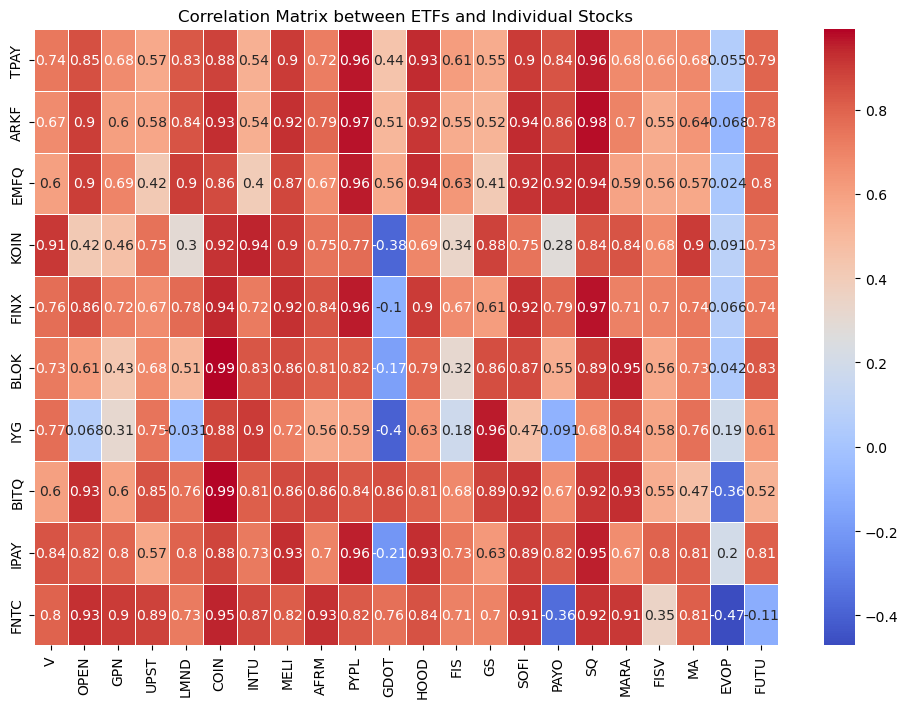

In [16]:
# Assuming you have functions to load data from CSV files
def load_data(file_path):
    return pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Load ETF data
etf_data = {etf[:-4]: load_data(f"{etf_folder}/{etf}") for etf in os.listdir(etf_folder) if etf.endswith('.csv')}

# Load individual stocks data
equity_data = {equity[:-4]: load_data(f"{equity_folder}/{equity}") for equity in os.listdir(equity_folder) if equity.endswith('.csv')}

# Calculate correlations
correlation_matrix = pd.DataFrame(index=etf_data.keys(), columns=equity_data.keys())

for etf in etf_data:
    for equity in equity_data:
        correlation_matrix.loc[etf, equity] = etf_data[etf]['Close'].corr(equity_data[equity]['Close'])

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix between ETFs and Individual Stocks')
plt.show()

In [17]:
# Extract relevant columns
equity_df_subset = equity_df[['Date', 'Close']]
etf_df_tpay_subset = etf_df_tpay[['Date', 'Close']]

# Merge data on 'Date'
merged_df = pd.merge(equity_df_subset, etf_df_tpay_subset, on='Date', suffixes=('_Equity', '_TPAY'))

# Plotting the closing prices over time
plt.figure(figsize=(10, 6))

plt.plot(merged_df['Date'], merged_df['Close_Equity'], label='Equity')
plt.plot(merged_df['Date'], merged_df['Close_TPAY'], label='TPAY ETF')

plt.title('Equity vs. TPAY ETF - Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

NameError: name 'equity_df' is not defined